### Introducción a la probabilidad y variables aleatorias

##### Algunos conceptos que vamos a ver en esta notebook son:

* Introducción a las variables aleatorias
* Simulación de variables aleatorias
* Introducción a la teoría de distribuciones estadísticas. Principales medidas.
* Aplicación de test estadísticos. Normalidad.

Las funciones de distribución y de densidad surgieron de la necesidad de generalizar los sucesos que ocurrian en la naturaleza con diversas variables aleatorias. La generalización de estos eventos permite entender mejor la incertumbre que acarrean y generar estimaciones más precisas. Sus origenes se remotan a siglos antes de cristo con Tales de Mileto (probabilidad) y luego (múcho más luego) matemáticos como Bernoulli, Laplace, Gauss, Poison, de moivre, contribuyeron a la generalización de estas funciones.

In [1]:
# Importamos las librerías que vamos a estar usando para el análisis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm

/tmp/ipykernel_11029/845521819.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Parámetros
gl = 8
size = 10**6
mu = 0
sigma = 1

In [3]:
# Ahora sí creamos un vector de variables aletorias distribuidas de acuerdo a lo siguiente
s = np.random.uniform(low = 0, high = 1, size = size)
s1 = np.random.normal(loc = mu, scale = sigma, size = size)
s2 = np.random.standard_t(df = gl, size = size)

##### ¿Qué son los grádos de libertad de una distribución?

Los grados de libertad son la cantidad de observaciones independientes que pueden variar sin violar las restricciones 
asociadas a la muestra. La explicación intuitiva que aplica para las fórmulas de las distribuciones y de la varianza es que
si queremos estimar una media poblacional (o la varianza muestral) solo tenemos una única restricción. ¿Cuál es? basicamente
si tenemos una muestra con de 5 valores, solo puedo variar 4 porque el quinto valor tiene que ser tal que la media poblacional
de el verdadero valor. Por el contrario, la media muestral no tiene grados de libertad dado que no presenta restricciones.

Mientras más grados de libertad dispongamos más nos acercaremos al valor poblacional real y al verdadero comportamiento de 
la variable aleatoria en análisis.

$$
s={\sqrt {{\frac {1}{N-1}}\sum _{i=1}^{N}(x_{i}-{\overline {x}})^{2}}}
$$


Acá podemos ver la diferencia entre las distintas formas que tenemos de calcular el desvío estandar:

* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html
* https://numpy.org/doc/stable/reference/generated/numpy.std.html

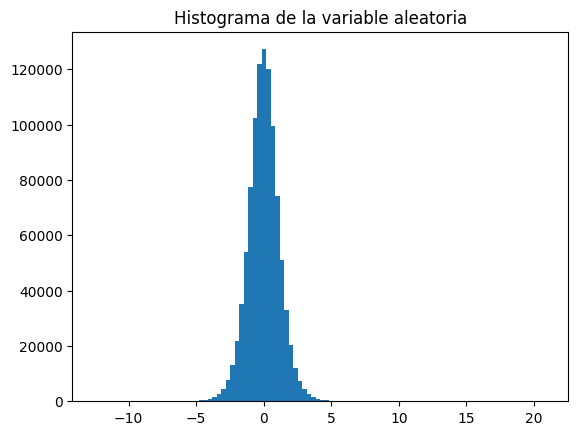

In [4]:
# Realizmaos un histograma de estas distribuciones
plt.figure()
plt.hist(s2, bins=100)
plt.title("Histograma de la variable aleatoria")
plt.show()

##### Calculamos los quantiles de la distribución:

Los quantiles son valores de una distribución que dividen una muestra en proporciones específicas. Para esto, los datos tienen que estar ordenados de menor a mayor. Por ejemplo, el valor del quantil de 50% de una muestra es la mediana y separa a la muestra en partes iguales.

En general, solemos hablar de percentiles. Los percentiles no son más que quantiles pero que dividen la data en 100 grupos de partes iguales.

In [5]:
# Lo primero que hacemos es generar un vector con los quantiles deseados:
percentiles = np.arange(0.0, 1.05, 0.05) * 100
print(percentiles)

[  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100.]


In [6]:
# Ahora calculamos los percentiles y vemos donde se encuentra cada valor
valores_percentiles = np.percentile(s1, percentiles)
print(valores_percentiles)

[-4.85619221e+00 -1.64764002e+00 -1.28075837e+00 -1.03574393e+00
 -8.40439628e-01 -6.73309532e-01 -5.23602381e-01 -3.84223134e-01
 -2.52060846e-01 -1.24701442e-01  9.98039569e-04  1.26099195e-01
  2.53504708e-01  3.85880339e-01  5.25658464e-01  6.76190767e-01
  8.42772100e-01  1.03776303e+00  1.28147693e+00  1.64377412e+00
  4.69241762e+00]


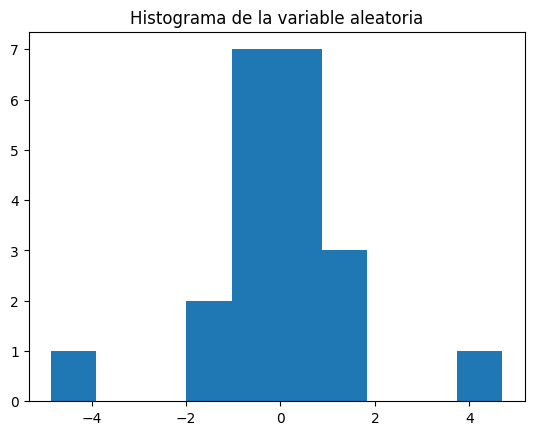

In [7]:
# Realizmaos un histograma de estas distribuciones
plt.figure()
plt.hist(valores_percentiles)
plt.title("Histograma de la variable aleatoria")
plt.show()

##### ¿Qué son la curtosis y la asimetría de una distribución? 

La curtosis es una medida estadística que nos habla de la forma de una distribución. Nos habla de cuan alejados de la medida tenemos los datos.
Esto no quiere decir que tenemos mayor varianza sino, más bien, nos habla de cuan largas son las colas de la distribución.

Tenemos dos tipos de curtosis en general: Una curtosis convencional y una curtosis en exceso. Como la curtosis de una distribución normal estandar
es igual a 3, lo que suele hacerse es ajustar el momento cuatro restandole un 3 para que la curtosis de una normal sea igual a 0.

Por otro lado, la curtosis nos dice cuantos valores tenemos por derecha y por izquierda respuesto a la media de una distribución. Es por eso que se utiliza el momento 3 con el objetivo de seguir mantendiendo el signo. Por ejemplo, al hablar de una distribución de rendimientos, tenes un sesgo (o una distribución asimétrica a la derecha) positivo nos dice que tenemos más valores a la derecha de la media aunque esto nos puede esta hablando de valores anómalos también. Acá es donde es importante interpretar la kurtosis.

Ambos conceptos son útiles a la hora de analizar si una distribución es semejante a una normal o no. Que se cumpla esta propiedad nos puede ayudar a simplificar muchos inconvenientes que podemos tener en el modelado

In [8]:
# Calculamos los momentos de orden 3 (asimetría o sesgo) y el momento de orden 4 (kurtosis).
print('Curtosis de Fisher (en exceso):' + str(st.kurtosis(s1)))
print('Curtosis de Person:' + str(st.kurtosis(s1, fisher=False)))
print('Medida de asimetría:' + str(st.skew(s1)))
print('Media:' + str(np.mean(s1)))
print('Desvío estandar (volatilidad):' + str(np.std(s1)))

Curtosis de Fisher (en exceso):-0.0004284910996630309
Curtosis de Person:2.999571508900337
Medida de asimetría:-0.0010768591679775257
Media:0.0006719403100990829
Desvío estandar (volatilidad):1.000275441326539


##### ¿Qué son las colas largas y las colas pesadas de una distribución? 

Los conceptos de colas largas y colas pesadas generalmente se usan indistintamente ya que ambos significan una mayor frecuencia en la ocurrencia de valores extrémos. No obstante, el concepto de colas pesadas también generalmente esta asociado a una mayor varianza producto que la velocidad con la que caen las colas es mucho menor.

In [9]:
# Calculamos los momentos de orden 3 (asimetría o sesgo) y el momento de orden 4 (kurtosis).
print('Curtosis de Fisher (en exceso):' + str(st.kurtosis(s2)))
print('Curtosis de Person:' + str(st.kurtosis(s2, fisher=False)))
print('Medida de asimetría:' + str(st.skew(s2)))
print('Media:' + str(np.mean(s2)))
print('Desvío estandar (volatilidad):' + str(np.std(s2)))

Curtosis de Fisher (en exceso):1.526738001266268
Curtosis de Person:4.526738001266268
Medida de asimetría:0.013159441137180504
Media:0.0011861563901219977
Desvío estandar (volatilidad):1.1552230210601004


##### Estadístico de normalidad jarque bera:

$$
JB = \frac{n}{6} \left( S^2 + \frac{1}{4}(K-3)^2 \right)
$$

Donde,

$$
S={\frac {{\hat {\mu }}_{3}}{{\hat {\sigma }}^{3}}}={\frac {{\frac {1}{n}}\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{3}}{\left({\frac {1}{n}}\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}\right)^{3/2}}}
$$

$$
K={\frac {{\hat {\mu }}_{4}}{{\hat {\sigma }}^{4}}}={\frac {{\frac {1}{n}}\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{4}}{\left({\frac {1}{n}}\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}\right)^{2}}}
$$

Lo que podemos ver acá es que los momentos de orden 3 y de orden 4 estan normalizados alrededor de la varianza. Esto, cuando hablamos de una variable aleatoria que se distribuye normalmente vemos que la varianza es igual a 1. Pero en este caso estamos generalizando el caso.

Si lo pensamos intuitivamente, si la curtosis es muy grande el estadístico de jarque bera será lo suficientemente grande y eso genera que el valor del test de jarque bera (se distribuye asintoticamente como una chi cuadrado) sea muuy grande y eso genera que el p-value se encuentre muy a la derecha de la distribución. Con lo cual, el p-value es muy chico dado que no tenemos más probabilidad acumulada de la derecha.

La hipótesis nula del test de jarque bera es la normalidad de la distribución.

##### ¿Qué es el p-value?:

El p-value es la probabilidad de obtener un resultado al menos tan extremo como el observado, asumiendo que  la hipótesis nula es verdadera. En otras palabras, es la probabilidad de observar los datos que has recolectado (o resultados más extremos) si la hipótesis nula es cierta. En términos sencillos, el p-value es el área bajo al función de densidad (probabilidad) que acumula a partir de un determinado nivel de confianza.

$$
p=\Pr(T\geq t\mid H_{0})
$$

Por esta razón es la que se dice que valores bajos del p-value nos permiten rechazar la hipotesis nula. Si la probabilidad es muy chiquita (es decir, el p-value es muy chico) quiere decir que verdaderamente tuve un evento extremo en mi distribución y la probabilidad de encontrar otro evento extremo es muy baja. Con lo cual, puedo rechazar la hipótesis nula.

In [10]:
# Dejamos guardados los estadísticos
curtosis = st.kurtosis(s2)
asimetria = st.skew(s2)
media = np.mean(s2)
desvio = np.std(s2)

In [11]:
# Hacemos los cálculos del estadístico jarque bera
jb_stat = size/6 * (asimetria**2 + 1/4*curtosis**2)

# Cálculamos el p-value. Si el p-value es mayor al 5% no podemos rechazar la hipotesis nula de normalidad. Con una confianza del 95% porciento
# podemos afirmar que esta distribución se comporta como una normal.
p_value = 1 - st.chi2.cdf(jb_stat, df=2)

# Imprimimos los resultados
print(jb_stat)
print(p_value)
print(p_value > 0.05)

97150.90033644543
0.0
False


In [12]:
# También podemos seguir la documentación de scipy para calcular el estadístico
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.jarque_bera.html
res = st.jarque_bera(s2)
print(res.statistic)
print(res.pvalue)

97150.90033644543
0.0


##### ¿Qué otras formas de inferir la normalidad tenemos?:

Las representaciones gráficas son muy útiles aunque a veces pueden ser engañosas. No toda distribución con una forma acampanada es una normal y es ahí donde toman relevancia tener en considereación los conceptos de kurtosis, asimétrica (colas largas o colas pesadas). Es por esto, que además de realizar un historgrama para visualizar los datos, conviene acompañarlo de un gráfico llamado QQplot (Quantile-Quantile).

En términos simples, un gráfico de QQplot lo que hace es agarrar nuestro set de datos y darle a cada punto el quantile que le correponda. Luego, con una distribución normal teorica hace lo mismo con los mismos quantiles. En nuestro caso, vamos a tener una muestra de 1 millón de datos con lo cual vamos a tener 1 millón de quantiles que también vamos a plasmar en la distribución normal. El gráfico no es más que la interección de los valores que representan cada una de las distribuciones. Si los datos se distribuyen como una normal, todos los datos deberían estar sobre una línea recta.

Los gráficos de QQplot nos pueden servir para comprar con cualquier otra distribución

/home/lautipintos/Documentos/finance_fundamentals/env/lib/python3.11/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 1200x600 with 0 Axes>

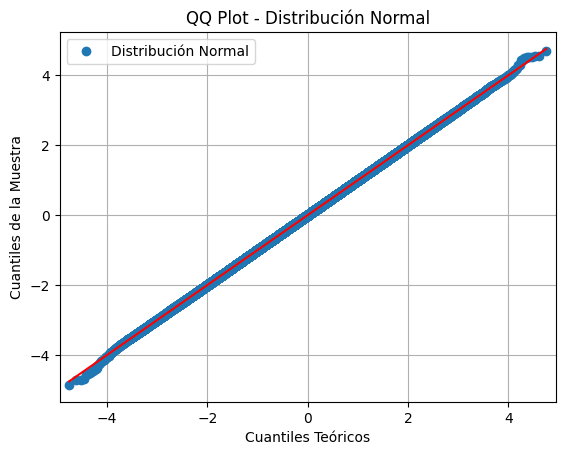

In [13]:
# También tenemos otras formas de analizar la normalidad de una variable aleatoria:
plt.figure(figsize=(12, 6))
sm.qqplot(s1, 
          line='s', 
          label='Distribución Normal', color='blue')
plt.title('QQ Plot - Distribución Normal')
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles de la Muestra')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

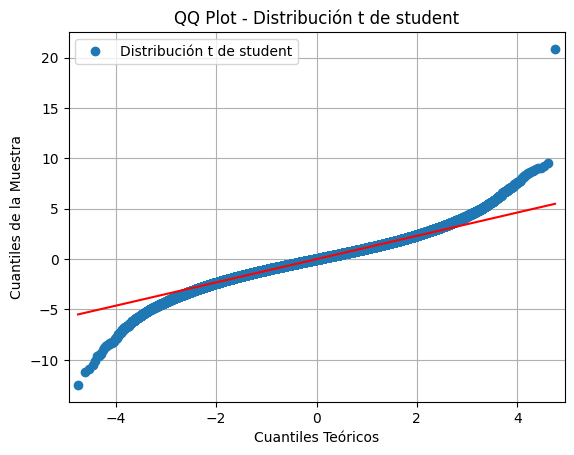

In [14]:
# También tenemos otras formas de analizar la normalidad de una variable aleatoria:
plt.figure(figsize=(12, 6))
sm.qqplot(s2, 
          line='s', 
          label='Distribución t de student', color='blue')
plt.title('QQ Plot - Distribución t de student')
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles de la Muestra')
plt.legend()
plt.grid(True)
plt.show()